# Proyek Analisis Data: [Bike Sharing Datasets]
- **Nama:** [Inggit Insani]
- **Email:** [insnyninggittt11@gmail.com]
- **ID Dicoding:** [insyniigittt]

## Menentukan Pertanyaan Bisnis



Kumpulan data ini berisi data berbagi sepeda dari tahun 2011 dan 2012, termasuk statistik penggunaan per jam dan harian.

Catatan Tambahan Dataset :

- **'temp'** adalah suhu yang dinormalkan yang dihitung menggunakan skala. Dalam kumpulan data ini, 0 mewakili suhu terendah, dan 1 mewakili suhu maksimum. Misalnya, jika 'temp' adalah 0,5, artinya suhu berada di tengah-tengah antara nilai minimum dan maksimum.
- **'atemp'** merupakan suhu yang dirasakan oleh manusia (dipengaruhi oleh suhu, kelembapan, dan angin), sehingga nyaman untuk beraktivitas. Dalam kumpulan data ini, suhu diukur pada skala 0-1.
Karena informasi pada kedua berkas tersebut relatif mirip dan hanya dibedakan oleh variabel 'hr' di hour.csv, maka diputuskan untuk menggunakan hour.csvdata tersebut karena berisi catatan yang lebih rinci.
# Mendefinisikan Pertanyaan Bisnis
1. Apa perbedaan pola penyewaan sepeda antara pengguna umum (kasual) dan pengguna terdaftar?
2. Pada jam berapakah dalam sehari konsentrasi penyewaan sepeda tertinggi diamati baik untuk pengguna umum maupun pengguna terdaftar?
3. Dapatkah kami mengidentifikasi anomali atau peristiwa besar (seperti cuaca ekstrem atau hari libur nasional) berdasarkan lonjakan atau penurunan tiba-tiba dalam jumlah total penyewaan sepeda (cnt)?

## Impor Semua Packages/Library yang Digunakan

In [ ]:
# Impor library yang akan dibutuhkan
import pandas as pd
import zipfile
import os
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
import kagglehub
import pandas as pd
import os

# Unduh dataset dan dapatkan jalur ke direktori
lakshmi25npathi_bike_sharing_dataset_path = kagglehub.dataset_download('lakshmi25npathi/bike-sharing-dataset')

print('Data source import complete.')

# Buat jalur ke file hour.csv menggunakan direktori yg diunduh
hour_csv_path = os.path.join(lakshmi25npathi_bike_sharing_dataset_path, 'hour.csv')
day_csv_path = os.path.join(lakshmi25npathi_bike_sharing_dataset_path, 'day.csv')


# Verifikasi keberadaan file
if os.path.exists(hour_csv_path) and os.path.exists(day_csv_path):
    print("Dataset files are ready to use!")
else:
    print("Dataset files are missing. Please check the input directory.")

# Baca file CSV menggunakan pandas
df_hour_data = pd.read_csv(hour_csv_path, delimiter=",")

# Menampilkan beberapa baris pertama dari setiap kerangka data
print("\nHour Data:")
print(df_hour_data.head())

Data source import complete.
Dataset files are ready to use!

Hour Data:
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


### Assessing Data

In [ ]:
# Periksa tipe data
df_hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


### Memeriksa apakah data ordinal dan nominal memiliki nilai yang sesuai dengan instruksi.
---

Catatan: fungsi range() menyertakan nilai awal tetapi tidak menyertakan nilai akhir

In [ ]:
valid_ranges = {
    'season': range(1, 5),         # Seasons: 1 to 4
    'weathersit': range(1, 5),     # Weather situations: 1 to 4
    'weekday': range(0, 7),        # Weekday: 0 (Sunday) to 6 (Saturday)
    'yr': [0, 1],                  # Year: 0 (2011), 1 (2012)
    'mnth': range(1, 13),          # Months: 1 to 12
    'hr' : range(0,24),            # Hour: 24 hour
    'holiday': [0, 1],             # Holiday: 0 (No), 1 (Yes)
    'workingday': [0, 1],          # Working day: 0 (No), 1 (Yes)
}

# Daftar kumpulan data yang perlu diperiksa
datasets = {
    "df_hour_data": df_hour_data
}

# Ulangi setiap kumpulan data
for dataset_name, dataset in datasets.items():
    print(f"\nChecking dataset: {dataset_name}")

    # Inisialisasi laporan untuk nilai yang tidak valid
    invalid_values_report = {}

    # Ulangi setiap variabel dan periksa nilai yang tidak valid
    for column, valid_range in valid_ranges.items():
        if column in dataset.columns:
            # Periksa nilai yang tidak valid
            invalid_rows = dataset[~dataset[column].isin(valid_range)]
            if not invalid_rows.empty:
                invalid_values_report[column] = invalid_rows

    # Menampilkan hasil untuk dataset saat ini
    if not invalid_values_report:
        print("Semua variabel ordinal dan nominal memiliki data yang valid.")
    else:
        print("Variabel berikut memiliki data yang tidak valid:")
        for column, invalid_rows in invalid_values_report.items():
            print(f"Variable '{column}' Memiliki nilai tidak valid di baris berikut:")
            print(invalid_rows)


Checking dataset: df_hour_data
Semua variabel ordinal dan nominal memiliki data yang valid.


### Periksa nilai negatif untuk casual dan registered
Keduanya tidak boleh mengandung nilai negatif

In [ ]:
casual_registered_columns = ['casual', 'registered']
invalid_casual_registered = df_hour_data[
    (df_hour_data['casual'] < 0) | (df_hour_data['registered'] < 0)
]

if not invalid_casual_registered.empty:
    print("\nNilai tidak vslid dalam kolom casual atau registered (nilai negatif):")
    print(invalid_casual_registered)
else:
    print("\nTidak ada nilai tidak valid di kolom casual atau registered.")


Tidak ada nilai tidak valid di kolom casual atau registered.


### Periksa apakah kolom cnt sama dengan (casual + registered)

In [ ]:
def check_discrepancies(df):
    discrepancy = df[df['cnt'] != (df['casual'] + df['registered'])]

    if not discrepancy.empty:
        print(f"\nPerbedaan ditemukan pada baris {len(discrepancy)} rows:")
        print(discrepancy)
    else:
        print("\nTidak ada perbedaan : cnt sama dengan kolom casual + registered untuk semua baris.")

# Periksa apakah cnt sama dengan casual + registered
check_discrepancies(df_hour_data)


Tidak ada perbedaan : cnt sama dengan kolom casual + registered untuk semua baris.


**Insight:**
- Tidak ada nilai nol dalam data.
- Terdapat kesalahan tipe data untuk 'dteday', yang seharusnya memiliki tipe data 'date'.
- Tidak ada nilai yang tidak valid ditemukan untuk data ordinal dan nominal.
- Tidak ada nilai negatif untuk kasual, terdaftar, dan cnt.
Nilai cnt benar (kasual + terdaftar).

In [ ]:
summary = df_hour_data.describe()
print(summary)

          instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.

***Insight:***

- Setiap kolom berisi 17.379 catatan, artinya tidak ada nilai yang hilang.
- Kolom season, yr, mnth, dan hrtampak konsisten berdasarkan jumlah rekaman. Plot distribusi frekuensi diperlukan untuk analisis yang lebih mendalam.
- Kolom holiday(biner [0,1]) dengan nilai rata-rata 0,02 menunjukkan sejumlah kecil hari libur. Nilai 1 (benar) menunjukkan hari libur.
- Kolom weekday(Minggu-Sabtu, 0-6) memiliki rata-rata 3. Plot distribusi frekuensi diperlukan untuk analisis lebih lanjut.
- Kolom workingday(biner [0,1]) dengan nilai rata-rata 0,6 menunjukkan bahwa sebagian besar hari adalah hari kerja. Nilai 1 (benar) menunjukkan hari kerja.
- Kolom ini weathersitmenggambarkan kondisi cuaca, berkisar antara 1-4. Rata-rata 1,4 menunjukkan kondisi cuaca yang sebagian besar cerah atau berawan.
- Kolom tempdan atempmemiliki nilai rata-rata 0,4, yang menunjukkan kondisi cuaca secara umum berada di kisaran tengah antara minimum (0) dan maksimum (1).
- Kolom humiditydengan nilai rata-rata 0,6 menunjukkan kelembapan sedang. Nilai 0 menunjukkan kondisi kering, sedangkan 1 menunjukkan kejenuhan penuh.
- Kolom windspeed, dengan minimum 0 dan maksimum 0,8, memiliki rata-rata mendekati 0,2, yang menunjukkan kecepatan angin umumnya rendah.
***Pengguna Biasa:** Kemungkinan distribusinya condong ke kanan, karena persentil Q1 adalah 4, jauh lebih kecil daripada Q3, yaitu 48. Deviasi standar (49) yang lebih besar daripada rata-rata (35) menunjukkan penyebaran data yang luas.
***Pengguna Terdaftar:** Kemungkinan distribusinya condong ke kanan, karena persentil Q1 adalah 34, jauh lebih kecil daripada Q3, yaitu 220. Deviasi standar (151) yang mendekati rata -rata (153) menunjukkan variasi data mendekati rata-rata.
***Total sewa (cnt):** Dispersi data sedang, karena deviasi standar (181) lebih kecil dan tidak jauh dari rata-rata (189). Nilai minimum 1 dan maksimum 977 menunjukkan rentang yang luas dan potensi outlier. Persentil Q1 adalah 40, jauh lebih kecil dari Q3, yaitu 281, yang menunjukkan kemungkinan distribusi yang condong ke kanan.
- Penting untuk dicatat bahwa total persewaan ( cnt) adalah jumlah pengguna biasa dan pengguna terdaftar .

### Cleaning Data

**Cleaning Data**
Tahapan : **(1) Define, (2) Code, (3) Verify**

In [ ]:
# (1) Define
# Kolom 'dteday' bertipe objek, jadi perlu diubah ke 'datetime'

# (2) Code
# Ubah 'dteday' menjadi datetime
df_hour_data['dteday'] = pd.to_datetime(df_hour_data['dteday'])

# (3) Verify
df_hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

- Buat visualisasi distribusi data untuk pengguna biasa dan terdaftar.
- Buat visualisasi kotak plot untuk data kasual dan terdaftar untuk mengidentifikasi outlier.
- Gunakan metode IQR untuk menangani outlier apa pun.
- Buat visualisasi kotak plot untuk data kasual dan terdaftar setelah menangani outlier.
- Buat visualisasi distribusi data untuk pengguna biasa dan terdaftar setelah menangani outlier.

***1. Distribusi data kasual dan terdaftar**

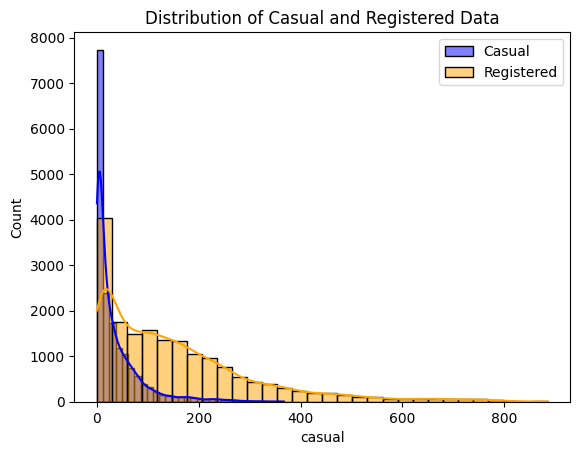

In [ ]:
sns.histplot(df_hour_data['casual'], kde=True, bins=30, color='blue', label='Casual')
sns.histplot(df_hour_data['registered'], kde=True, bins=30, color='orange', label='Registered')
plt.legend()
plt.title('Distribution of Casual and Registered Data')
plt.show()

***Insight:***

- Casual Data(Biru)
1. Sejumlah besar data berkelompok di sekitar 0, yang mengindikasikan banyaknya contoh penyewaan sepeda yang sangat sedikit atau tidak ada sama sekali.
2. Distribusi data condong ke kanan, dengan lebih banyak nilai terkonsentrasi di ujung bawah.
- Registered Data(Oranye)
1. Pengguna terdaftar memiliki distribusi yang lebih luas dibandingkan dengan pengguna biasa.
2. Nilai yang lebih sedikit terkonsentrasi di sekitar 0 dibandingkan dengan pengguna biasa, menunjukkan penyewaan sepeda terjadi lebih sering.
3. Distribusi data juga condong ke kanan, tetapi puncaknya lebih rendah daripada pengguna biasa.

***2. Visualisasikan Boxplot sebelum memperbaiki outlier***

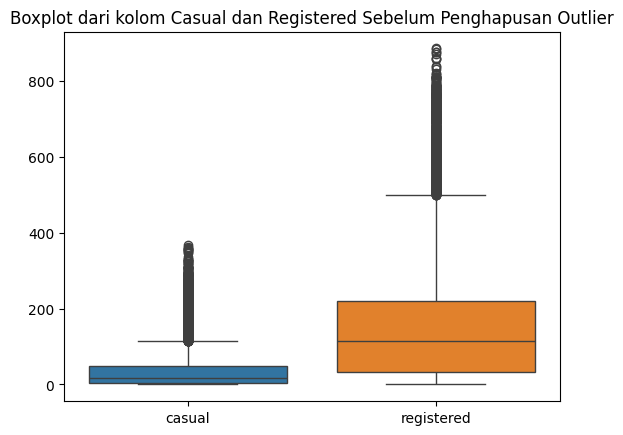

In [ ]:
sns.boxplot(data=df_hour_data[['casual', 'registered']])
plt.title('Boxplot dari kolom Casual dan Registered Sebelum Penghapusan Outlier')
plt.show()

***Insight:***

**1. Casual Data (Biru)**
- Nilai Median (17) sangat dekat dengan Q1 (4), yang menunjukkan bahwa sebagian besar data sewa kasual terkonsentrasi dalam kisaran yang sangat rendah.
- Ukuran kotak yang kecil menunjukkan variasi data terbatas.
- Terdapat outlier di atas batas maksimum, yang menunjukkan lonjakan tidak biasa dalam permintaan sewa tinggi.

 **2. Registered Data (Biru)**
- Nilai Median (115) terletak di dekat bagian tengah kotak, menunjukkan bahwa distribusi untuk pengguna terdaftar lebih seimbang dibandingkan dengan pengguna biasa.
- Kotak yang lebih lebar menunjukkan variasi data yang lebih besar.
- Terdapat outlier di atas batas maksimum, yang menunjukkan lonjakan tidak biasa dalam permintaan sewa tinggi.
- Nilai maksimum untuk pengguna terdaftar lebih tinggi daripada pengguna biasa, artinya pengguna terdaftar lebih sering menyewa sepeda.

 **Perbandingan**
- Pengguna terdaftar memiliki jangkauan dan variasi yang jauh lebih tinggi dan lebih konsisten dibandingkan dengan pengguna biasa.
- Kedua kategori memiliki outlier, tetapi pengguna terdaftar menunjukkan rentang nilai ekstrem yang lebih luas.

***3. Periksa dan tandai outlier menggunakan IQR***

In [ ]:
# Inisialisasi kolom 'is_outlier' dengan False
df_hour_data['is_outlier'] = False

for column in ['casual', 'registered']:
    Q1 = df_hour_data[column].quantile(0.25)
    Q3 = df_hour_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    # Identifikasi outlier
    outliers = df_hour_data[(df_hour_data[column] < lower_bound) | (df_hour_data[column] > upper_bound)]

    # Tandai baris dengan outlier di kolom 'is_outlier'
    df_hour_data.loc[outliers.index, 'is_outlier'] = True

    # Cetak Informasi Outlier
    print(f"Outliers in {column}: {len(outliers)} rows")
    print(f"Outlier values for {column}:")
    print(outliers[[column]])

# Verifikasi kolom 'is_outlier'
df_hour_data[['casual', 'registered', 'is_outlier']].head()

# Opsional : Hapus outlier jika diperukan untuk analisis tertentu (tetap menjaga kerangka data aslu tetap utuh)
df_no_outliers = df_hour_data[df_hour_data['is_outlier'] == False]

Outliers in casual: 1192 rows
Outlier values for casual:
       casual
1633      144
1634      149
1635      124
1771      126
1772      174
...       ...
16817     122
16818     148
16819     164
16820     167
16821     139

[1192 rows x 1 columns]
Outliers in registered: 680 rows
Outlier values for registered:
       registered
2995          539
3019          532
3067          540
3187          521
3379          524
...           ...
17063         512
17077         665
17086         536
17087         546
17101         585

[680 rows x 1 columns]


***Insight:***

1. Casual (Biru)
- Outlier yang terdeteksi: 1.192 baris
- Contoh Nilai Outlier: 144, 149, 124, 174
- Nilai-nilai ini secara signifikan lebih tinggi dibandingkan dengan distribusi data dalam IQR, dimana median (17) sangat dekat dengan Q1 (4).
2. Registered (Oranye)
- Nilai Outlier yang Terdeteksi: 680 baris
- Contoh Nilai Outlier: 539, 532, 540, 521
- Nilai-nilai ini sangat tinggi dibandingkan dengan ambang batas maksimum Q3 (220).

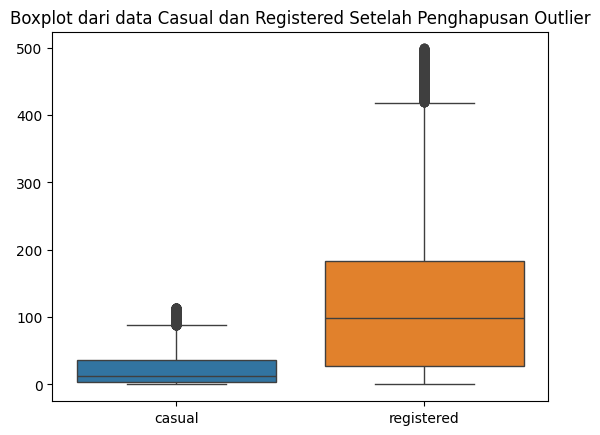

In [ ]:
# Visualisasikan setelah memperbaiki outlier
# Gunakan kerangka data "df_no_outliers"
sns.boxplot(data=df_no_outliers[['casual', 'registered']])
plt.title('Boxplot dari data Casual dan Registered Setelah Penghapusan Outlier')
plt.show()

***Insight:***

1. Casual (Biru)
- Penggunaan sepeda sebagian besar terpusat pada kecepatan 0-50.
- Setelah menghilangkan outlier, puncak data di sekitar 0 tampak lebih rendah.
2. Registered (Oranye)
- Data penggunaan sepeda lebih tersebar dalam kisaran 0-100.
- Setelah menghilangkan outlier, puncak data di sekitar 0 tampak lebih rendah.

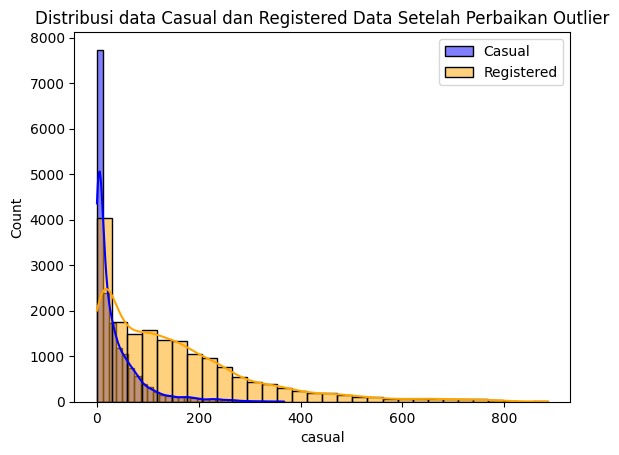

In [ ]:
# Visualisasikan distribusi data kasual dan terdaftar setelah memperbaiki outlier

sns.histplot(df_hour_data['casual'], kde=True, bins=30, color='blue', label='Casual')
sns.histplot(df_hour_data['registered'], kde=True, bins=30, color='orange', label='Registered')
plt.legend()
plt.title('Distribusi data Casual dan Registered Data Setelah Perbaikan Outlier')
plt.show()

***Insight:***

- Kerangka df_hour_datadata mempertahankan outlier, dengan kolom baru ditambahkan sebagai penanda.
- Nilai-nilai outlier df_hour_datadisimpan untuk memahami anomali yang menyebabkannya.
Kerangka data baru, df_no_outliers, dibuat dengan menghapus outlier. - - Distribusi data menjadi lebih seimbang, yang dapat membantu analisis lebih lanjut (jika diperlukan). Analisis tertentu mengharuskan outlier disesuaikan untuk mencegahnya mendistorsi hasil atau menimbulkan bias.
- Pengguna kasual cenderung menyewa sepeda lebih jarang daripada pengguna terdaftar. Hal ini terlihat dari rentang nilai yang lebih kecil dan penurunan tajam, yang kemungkinan dipengaruhi oleh faktor musiman.
- Pengguna terdaftar memiliki distribusi yang lebih luas karena mereka menyewa sepeda secara teratur. Pola penyewaan mereka lebih stabil.

## Visualization & Explanatory Analysis

***(Q1) Perbedaan Pola Sewa***

1. Visualisasi Sewa Harian
2. Perbandingan Hari Kerja vs Akhir Pekan

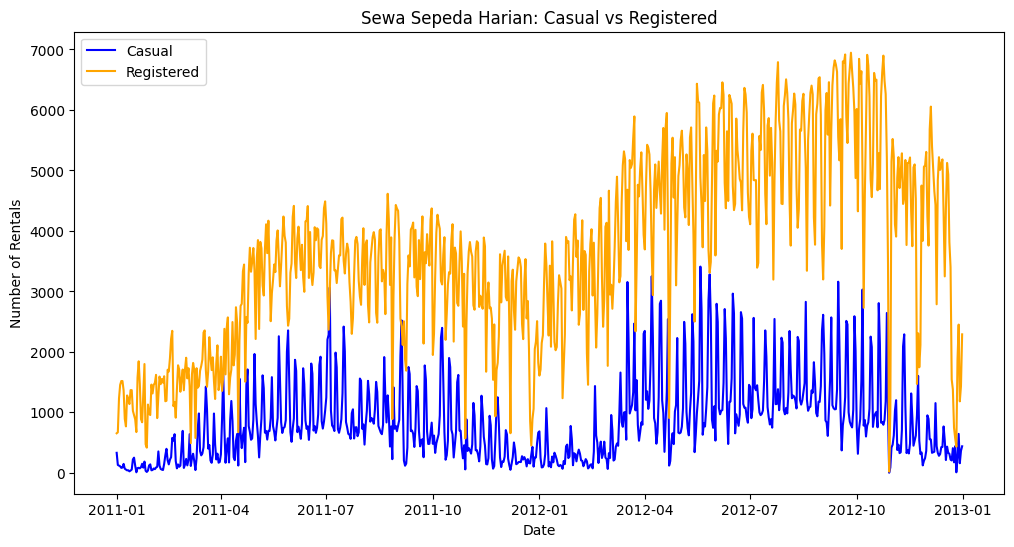

In [ ]:
# Sewa Sepeda Harian: Casual vs Registered
daily_data = df_hour_data.groupby('dteday')[['casual', 'registered']].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_data, x='dteday', y='casual', label='Casual', color='blue')
sns.lineplot(data=daily_data, x='dteday', y='registered', label='Registered', color='orange')
plt.title('Sewa Sepeda Harian: Casual vs Registered')
plt.xlabel('Date')
plt.ylabel('Number of Rentals')
plt.legend()
plt.show()

***Insight :***

- Pengguna terdaftar secara konsisten memiliki aktivitas penyewaan yang lebih tinggi dibandingkan dengan pengguna biasa sepanjang tahun.
- Pengguna terdaftar kemungkinan besar menggunakan layanan ini secara teratur, seperti untuk pergi bekerja atau sekolah.
- Kedua jenis pengguna menunjukkan lonjakan aktivitas selama bulan-bulan musim panas (sekitar Mei hingga September), kemungkinan karena kondisi cuaca yang mendukung untuk bersepeda.
- Penurunan aktivitas terjadi selama bulan-bulan musim dingin (Desember hingga Februari), mungkin karena cuaca yang kurang baik.
- Jumlah pengguna terdaftar mencapai puncaknya sekitar pertengahan musim panas, dengan beberapa hari mendekati atau melebihi 7.000 persewaan.
- Pengguna biasa juga mencapai puncaknya selama periode yang sama, meskipun jumlah mereka lebih rendah dibandingkan dengan pengguna terdaftar.

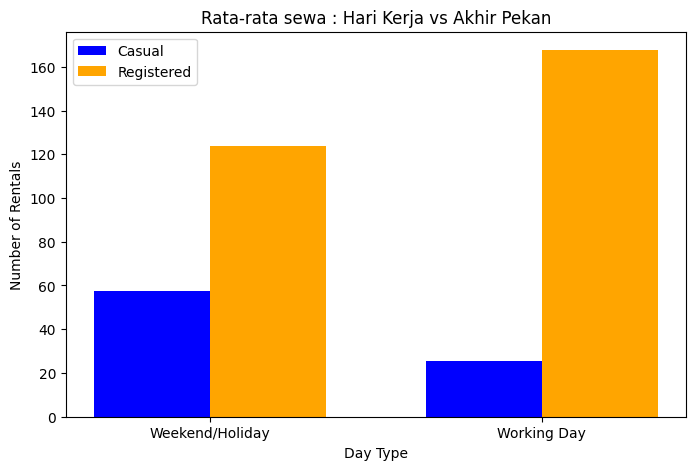

In [ ]:
# Rata-Rata sewa: Hari kerja Day vs Akhir Pekan
# Pengelompokan data berdasarkan hari kerja
workingday_data = df_hour_data.groupby('workingday')[['casual', 'registered']].mean().reset_index()
workingday_data['day_type'] = workingday_data['workingday'].map({0: 'Weekend/Holiday', 1: 'Working Day'})

# Position untuk bar
x = np.arange(len(workingday_data))  # Position of the bars
width = 0.35  # Width of each bar

# Membuat plot
plt.figure(figsize=(8, 5))

# Merencanakan casual data
plt.bar(x - width / 2, workingday_data['casual'], width, color='blue', label='Casual')

# Plotting data terdaftar
plt.bar(x + width / 2, workingday_data['registered'], width, color='orange', label='Registered')

# Menambahkan judul dan label
plt.title('Rata-rata sewa : Hari Kerja vs Akhir Pekan')
plt.ylabel('Number of Rentals')
plt.xlabel('Day Type')

# Menambahkan label x-tick
plt.xticks(x, workingday_data['day_type'])

# Menambahkan legenda
plt.legend()

# Menambahkan plot
plt.show()

***Insight :***

- Data pengguna kasual menunjukkan tarif sewa yang lebih tinggi selama akhir pekan atau hari libur dibandingkan dengan hari kerja. Pengguna kasual cenderung menggunakan layanan ini untuk kegiatan rekreasi atau bersantai.
- Data pengguna terdaftar menunjukkan tarif sewa yang lebih tinggi pada hari kerja dibandingkan dengan akhir pekan atau hari libur. Hal ini menunjukkan bahwa pengguna terdaftar kemungkinan besar menggunakan - layanan ini untuk perjalanan rutin, seperti untuk bekerja atau sekolah.
- Pada hari kerja, pengguna terdaftar mendominasi penyewaan dibandingkan dengan pengguna biasa, menunjukkan bahwa layanan ini lebih sering digunakan oleh mereka yang memanfaatkannya untuk rutinitas sehari-hari.

***(Q2) Sewa sepeda tertinggi per jam***

Langkah-langkah Analisis:

1. Menggabungkan data kasual dan terdaftar berdasarkan jam.

   Tujuan: Untuk menemukan jam sibuk bagi pengguna biasa dan terdaftar.
2. Gunakan diagram garis untuk menunjukkan pola sepanjang hari.
Buat peta panas persewaan berdasarkan jam dan hari (hari kerja), yang menggabungkan data persewaan berdasarkan jam dan hari kerja.

   Tujuan: Untuk menunjukkan pola penggunaan berdasarkan kombinasi jam dan hari.
Gunakan peta panas untuk mengilustrasikan intensitas penyewaan.

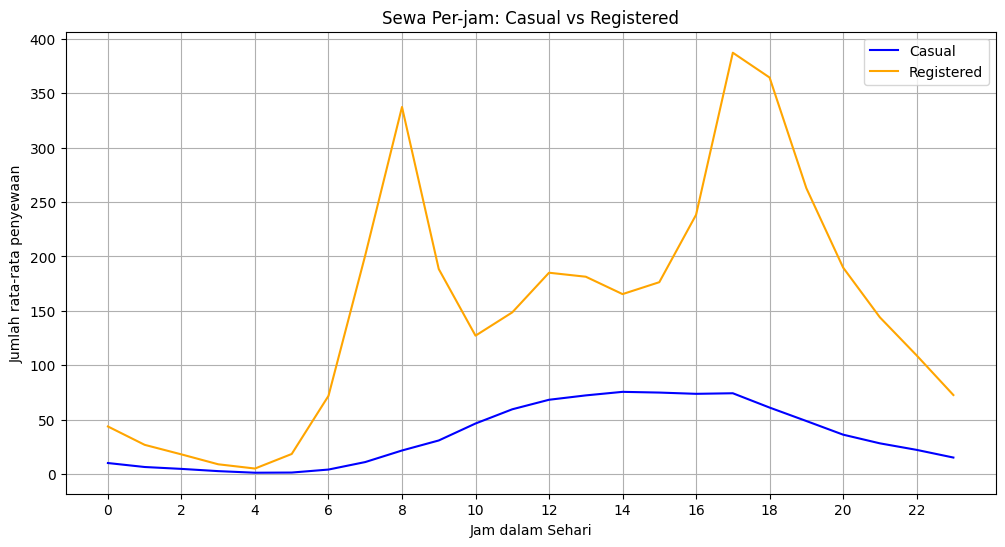

In [ ]:
# Plot garis sewa Casual & Registered per jam
# Agregasikan data casual dan registered berdasarkan hr
# Gunakan line plot untuk menunjukkan pola sepanjang hari

hourly_data = df_hour_data.groupby('hr')[['casual', 'registered']].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_data, x='hr', y='casual', label='Casual', color='blue')
sns.lineplot(data=hourly_data, x='hr', y='registered', label='Registered', color='orange')
plt.title('Sewa Per-jam: Casual vs Registered')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Jumlah rata-rata penyewaan')
plt.legend()
plt.xticks(range(0, 24, 2))
plt.grid(True)
plt.show()

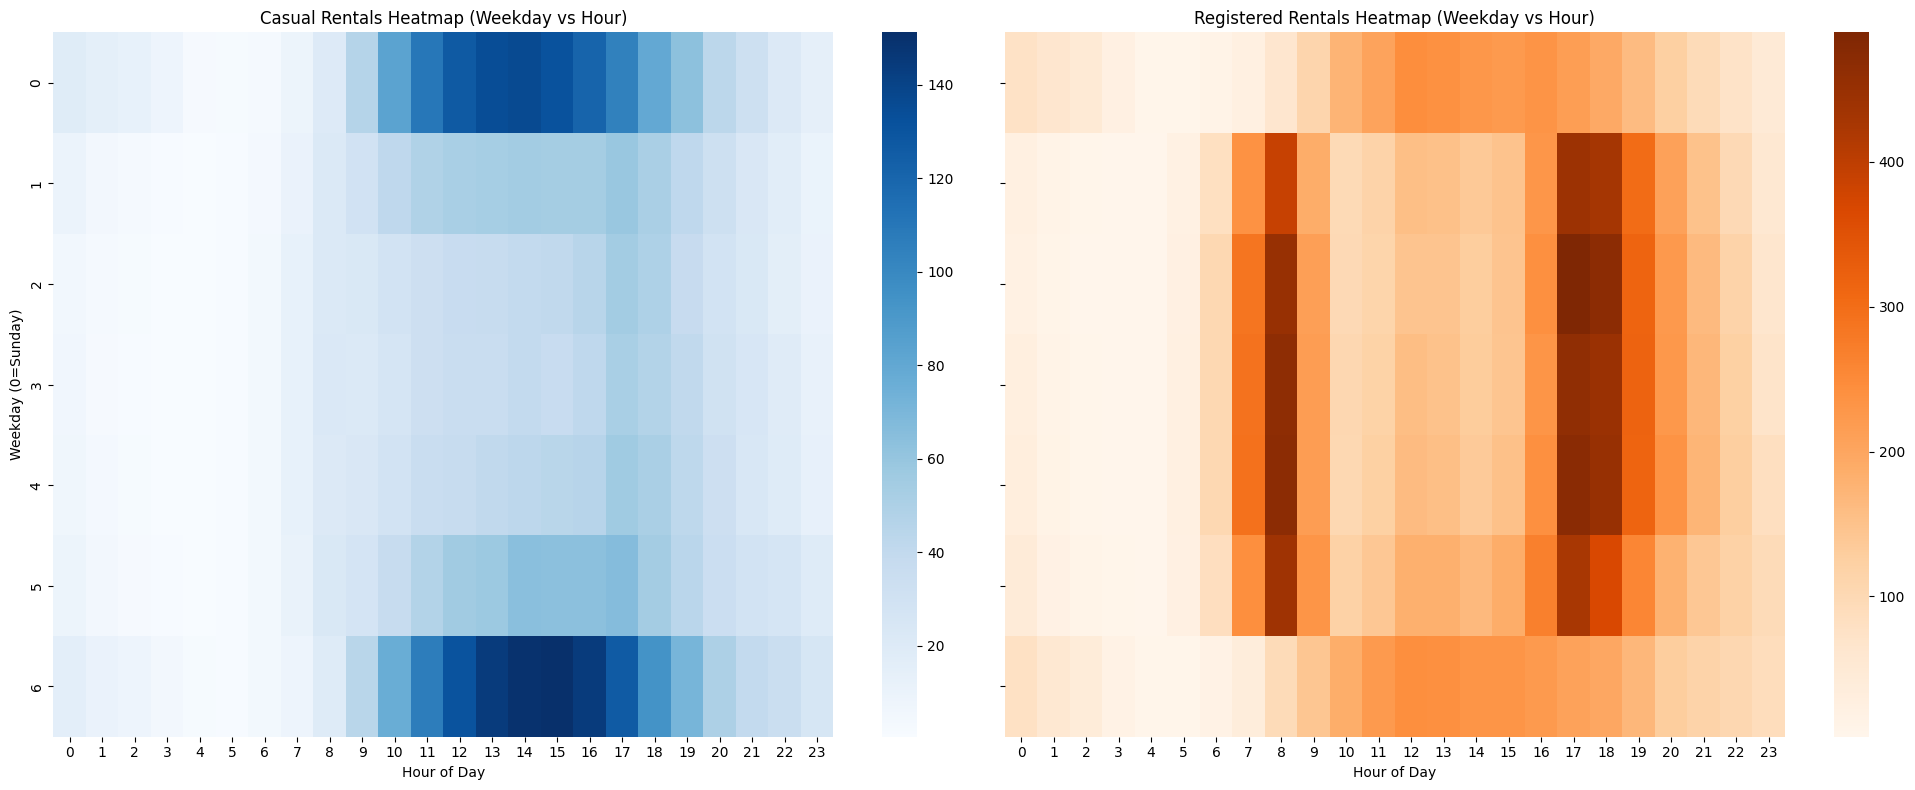

In [ ]:
# Heatmap Penyewaan Casual & Registered (Hari Kerja vs Jam Kerja)
# Agresikan data casual dan registered berdasarkan weekday dan hr
# Gunakan heatmap untuk menggambarkan intensitas penyewaan

# Mempersiapkan data untuk heatmap
heatmap_data = df_hour_data.groupby(['weekday', 'hr'])[['casual', 'registered']].mean().unstack()

# Buat subplot
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)

# Heatmap untuk Casual
sns.heatmap(heatmap_data['casual'], cmap='Blues', ax=axes[0], annot=False, cbar=True)
axes[0].set_title('Casual Rentals Heatmap (Weekday vs Hour)')
axes[0].set_ylabel('Weekday (0=Sunday)')
axes[0].set_xlabel('Hour of Day')

# Heatmap untuk Registered
sns.heatmap(heatmap_data['registered'], cmap='Oranges', ax=axes[1], annot=False, cbar=True)
axes[1].set_title('Registered Rentals Heatmap (Weekday vs Hour)')
axes[1].set_ylabel('')  # Remove y-label for the second plot for cleaner look
axes[1].set_xlabel('Hour of Day')

# Tampilkan plot
plt.tight_layout()
plt.show()

***Insight :***

- Data pengguna biasa lebih terkonsentrasi pada akhir pekan (Sabtu, Minggu), sementara pengguna terdaftar lebih aktif pada hari kerja.
- Pengguna terdaftar menunjukkan dua puncak utama dalam aktivitas:
Pagi (sekitar jam 8 pagi) dan
Malam (sekitar jam 5-6 sore).
- Puncak dalam data pengguna terdaftar kemungkinan mencerminkan perjalanan rutin ke tempat kerja atau sekolah.
- Aktivitas pengguna terdaftar menurun secara signifikan di luar jam sibuk ini.
- Penyewaan pengguna kasual lebih konsisten sepanjang hari tanpa puncak yang tajam.
- Aktivitas pengguna biasa mencapai puncaknya di sore hari (sekitar pukul 2-4 sore), yang menunjukkan penggunaan rekreasi atau waktu senggang.

***(Q3) Anomali berdasarkan lonjakan atau penurunan tiba-tiba***

Langkah-langkah Analisis:

1. Menganalisis Lonjakan dan Penurunan Sewa untuk Mengidentifikasi Anomali

- Hitung Perubahan Sewa Harian

 - Ubah data sewa sepeda per jam menjadi data harian dengan menjumlahkan total sewa ( cnt) untuk setiap hari menggunakan groupbydan aggfungsi.
 - Hitung perubahan harian jumlah sewa menggunakan diff()fungsi tersebut.
 - Tambahkan variabel baru yang disebut changeuntuk menyimpan selisih antara total sewa dari satu hari ke hari berikutnya. Isi NaNnilai awal dengan 0menggunakan fillna(0).
- Mengidentifikasi Lonjakan dan Penurunan (Anomali) yang Signifikan

 - Hitung ambang batas untuk deteksi anomali menggunakan dua kali deviasi standar ( 2 * std) dari nilai perubahan harian ( change).
 - Tandai titik data yang perubahannya lebih besar atau lebih kecil dari ambang batas ini sebagai anomali.
- Visualisasikan Perubahan Sewa dengan Anomali yang Disorot

 - Buat diagram garis untuk menampilkan perubahan sewa harian dari waktu ke waktu.
 - Sorot anomali dengan menambahkan titik merah pada plot untuk menunjukkan lonjakan atau penurunan yang signifikan.
 - Sertakan garis horizontal untuk mewakili ambang batas positif dan negatif agar lebih mudah interpretasi visual.

<ipython-input-32-b4b5e2a51943>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  daily_data['change'].fillna(0, inplace=True)  # Fill NaN values at the start with 0


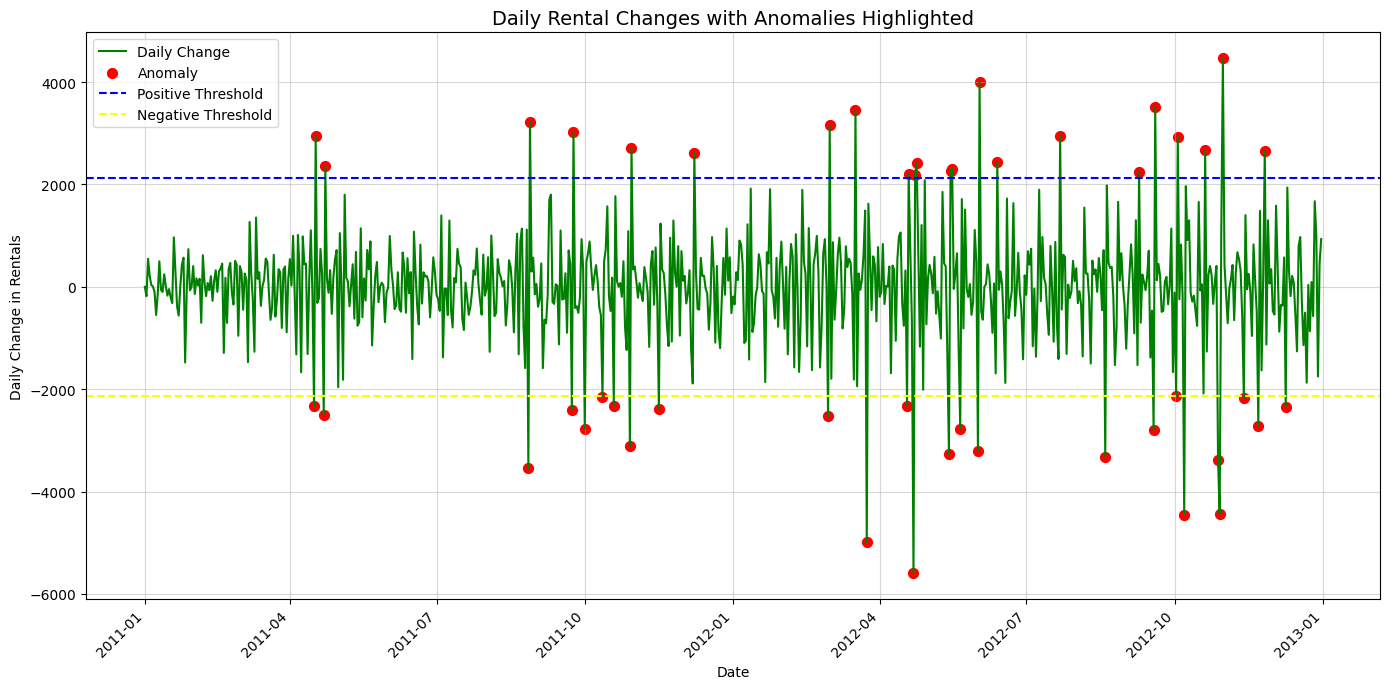

Number of anomalies detected: 47
Details of Anomalies:
        dteday   cnt  change
105 2011-04-16   795 -2331.0
106 2011-04-17  3744  2949.0
111 2011-04-22  1683 -2506.0
112 2011-04-23  4036  2353.0
238 2011-08-27  1115 -3546.0
239 2011-08-28  4334  3219.0
265 2011-09-23  2395 -2400.0
266 2011-09-24  5423  3028.0
273 2011-10-01  2429 -2773.0
284 2011-10-12  2416 -2147.0
291 2011-10-19  2424 -2324.0
301 2011-10-29   627 -3120.0
302 2011-10-30  3331  2704.0
319 2011-11-16  1817 -2378.0
341 2011-12-08  3322  2617.0
424 2012-02-29  1834 -2529.0
425 2012-03-01  4990  3156.0
441 2012-03-17  7836  3458.0
448 2012-03-24  3372 -4990.0
473 2012-04-18  4367 -2324.0
474 2012-04-19  6565  2198.0
477 2012-04-22  1027 -5597.0
478 2012-04-23  3214  2187.0
479 2012-04-24  5633  2419.0
499 2012-05-14  2843 -3275.0
500 2012-05-15  5115  2272.0
501 2012-05-16  7424  2309.0
506 2012-05-21  4359 -2770.0
517 2012-06-01  4127 -3211.0
518 2012-06-02  8120  3993.0
529 2012-06-13  7421  2449.0
568 2012-07-22  7

In [ ]:
# Perubahan Sewa Harian dengan Anomali yang Disorot
# Hitunglah perbedaan harian dalam jumlah sewa.
# Tambahkan variabel 'perubahan untuk menyimpan perbedaan antara
# total penyewaan sepeda (cnt) dari satu hari ke hari berikutnya (diff()).
# Gunakan grafik garis dengan sorotan untuk perubahan yang signifikan.

# === Bagian 1: Deteksi Anomali ---
#1. Gabungkan data per jam menjadi data harian
daily_data = df_hour_data.groupby('dteday').agg({'cnt': 'sum'}).reset_index()

# 2. Hitung perubahan harian
daily_data['change'] = daily_data['cnt'].diff()
daily_data['change'].fillna(0, inplace=True)  # Fill NaN values at the start with 0

# 3. Identifikasi anomali
threshold = daily_data['change'].std() * 2  # Threshold: 2 * standard deviation
anomalies = daily_data[abs(daily_data['change']) > threshold]

# === Part 2: Visualisasi ===
# Buat gambar dan sumbu untuk kontrol yang lebih baik
fig, ax = plt.subplots(figsize=(14, 7))

# Plot garis untuk perubahan harian
sns.lineplot(data=daily_data, x='dteday', y='change', ax=ax, label='Daily Change', color='green')

# Sorot anomali dengan scatter plot
ax.scatter(anomalies['dteday'], anomalies['change'], color='red', label='Anomaly', s=50)

# Tambahkan garis horizontal untuk ambang batas
ax.axhline(threshold, color='blue', linestyle='--', label='Positive Threshold')
ax.axhline(-threshold, color='yellow', linestyle='--', label='Negative Threshold')

# Tetapkan label dan judul sumbu
ax.set_title('Daily Rental Changes with Anomalies Highlighted', fontsize=14)
ax.set_xlabel('Date')
ax.set_ylabel('Daily Change in Rentals')

# Putar dan format tanggal sumbu X
fig.autofmt_xdate(rotation=45)

# Tambahkan legenda dan grid
ax.legend()
ax.grid(alpha=0.5)

# Sesuaikan tata letak
plt.tight_layout()

# Tampilkan plot
plt.show()

# === Part 3: Analisis ===
print(f"Number of anomalies detected: {len(anomalies)}")
print("Details of Anomalies:")
print(anomalies)


***Penjelasan :***

- Garis hijau menunjukkan perubahan harian dalam jumlah penyewaan sepeda. Secara keseluruhan, fluktuasi antara garis biru dan kuning menunjukkan pola harian yang relatif stabil dengan beberapa perubahan signifikan.
- Titik merah adalah anomali (perubahan signifikan yang melampaui ambang batas berdasarkan dua kali simpangan baku dari perubahan rata-rata). Ini mewakili hari-hari dengan perubahan drastis dalam penyewaan sepeda, baik peningkatan maupun penurunan.

***Insight ***

- Anomali Positif (Peningkatan Sewa yang Drastis): Titik merah di atas garis 0 menunjukkan peningkatan signifikan dalam jumlah penyewaan sepeda.
Kemungkinan penyebabnya termasuk cuaca cerah, acara khusus atau hari libur, dan perubahan musim (misalnya, awal musim semi atau musim panas), yang cenderung meningkatkan harga sewa.
- Anomali Negatif (Penurunan Sewa Drastis): Titik merah di bawah garis 0 menunjukkan penurunan signifikan dalam jumlah penyewaan sepeda.
Kemungkinan penyebabnya termasuk cuaca buruk, hari libur tertentu, atau masalah operasional seperti perawatan sepeda.
- Anomali yang lebih sering terjadi pada tahun 2012 dibandingkan dengan tahun 2011: Ini mungkin menunjukkan bahwa penggunaan sepeda menjadi lebih populer di tahun kedua.
Perubahan maksimum berkisar antara -5000 dan +4000: Fluktuasi besar ini menyoroti variabilitas tinggi dalam jumlah sewa harian

***2. Analisis Faktor Eksternal untuk Mengidentifikasi Apakah Anomali Sewa Terkait dengan Kondisi Cuaca***

Tahapan :
1. Gabungkan Data Anomali dengan Data Cuaca dan Kecepatan Angin

 - Kelompokkan data per jam menjadi data harian untuk menghitung statistik harian untuk kecepatan angin (windspeed) dan kondisi cuaca (weathersit).
 - Gunakan penggabungan untuk menggabungkan data anomali dengan data cuaca dan kecepatan angin berdasarkan kolom tanggal (dteday).
2. Visualisasikan Hubungan Antara Perubahan Sewa, Kecepatan Angin, dan Kondisi Cuaca

 - Buat diagram sebar untuk memvisualisasikan perubahan sewa harian (perubahan) terhadap kecepatan angin, dengan warna mewakili kondisi cuaca (cuaca).
 - Tambahkan garis horizontal untuk menyorot kecepatan angin rata-rata sebagai referensi.
3. Merangkum dengan Statistik Deskriptif

 - Hitung rata-rata dan deviasi standar perubahan sewa (change) dan kecepatan angin (windspeed) untuk setiap kondisi cuaca (weathersit).
 - Menampilkan jumlah hari anomali untuk setiap kondisi cuaca.

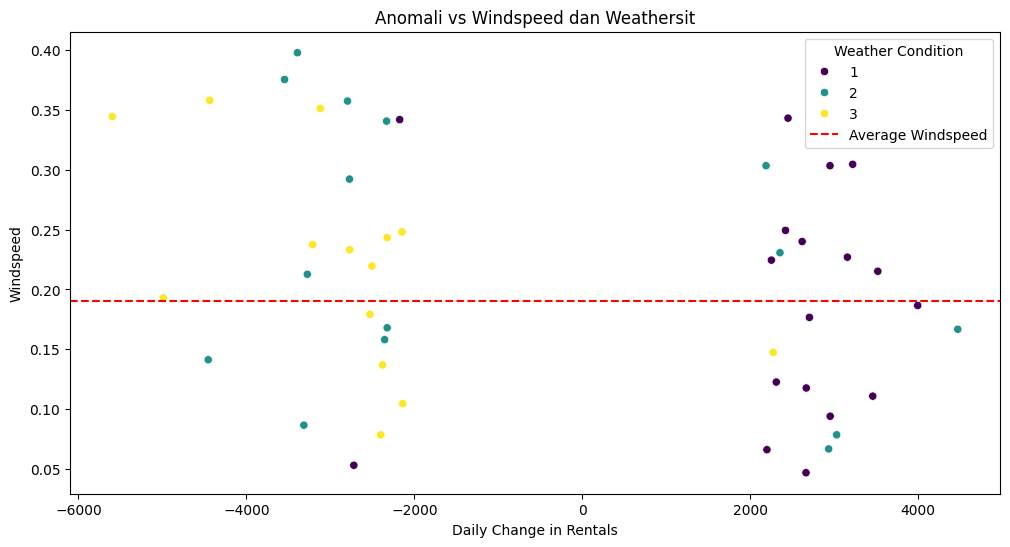

Descriptive Statistics for Anomalies (Weather Condition, Windspeed, and Changes):
                 change              windspeed           count_anomalies
                   mean          std      mean       std           count
weathersit                                                              
1           2256.888889  1780.520839  0.190160  0.097657              18
2          -1039.466667  3040.235608  0.225088  0.112905              15
3          -2734.000000  1814.966963  0.219633  0.088446              14


In [ ]:
# === Bagian 2: Analisis Hubungan dengan kondisi cuaca  ===

# 1. Mengumpulkan data per jam utk menghitung statistik weather dan windspeed
hourly_aggregated = df_hour_data.groupby('dteday').agg({
    'weathersit': lambda x: x.mode()[0],  # Mode utk weather
    'windspeed': 'mean',                 # Kecepatan rata-rata wind speed
    'cnt': 'sum'                         # Total sewa
}).reset_index()

# 2. Gabungkan data anomali deangan statistik harian weather
merged_data = anomalies.merge(hourly_aggregated, on='dteday', how='left')

# 3. Visualisasikan anomali terkait windspeed dan kondisi weather
plt.figure(figsize=(12, 6))
sns.scatterplot(data=merged_data, x='change', y='windspeed', hue='weathersit', palette='viridis')
plt.axhline(df_hour_data['windspeed'].mean(), color='red', linestyle='--', label='Average Windspeed')
plt.title('Anomali vs Windspeed dan Weathersit')
plt.xlabel('Daily Change in Rentals')
plt.ylabel('Windspeed')
plt.legend(title='Weather Condition')
plt.show()

# 4. Hitung statistik deskriptif untuk anomali berdasarkan kondisi weather
anomalies_weather = merged_data.groupby('weathersit').agg({
    'change': ['mean', 'std'],           # Statistik utk perubahan sewa
    'windspeed': ['mean', 'std'],        # Statistik wind speed
    'dteday': 'count'                    # Jumlah hari anomali
}).rename(columns={'dteday': 'count_anomalies'})

# Cetak dataframe sbg tabel
print("Descriptive Statistics for Anomalies (Weather Condition, Windspeed, and Changes):")
anomalies_weather_df = pd.DataFrame(anomalies_weather)
print(anomalies_weather_df.to_string())  # Menampilkan dataframe dgn rapi

In [ ]:
# Periksa distribusi weathersit di dataset asli
print(df_hour_data['weathersit'].value_counts())

weathersit
1    11413
2     4544
3     1419
4        3
Name: count, dtype: int64


***Penjelasan :***

1. Kisaran Kecepatan Angin dalam Anomali:

  Sebagian besar nilai kecepatan angin berada dalam kisaran 0,2 (ditandai dengan garis merah horizontal).
  Beberapa anomali dengan perubahan besar (baik positif maupun negatif) terjadi pada nilai kecepatan angin yang lebih tinggi (> 0,3), kemungkinan karena kondisi cuaca buruk.
2. Distribusi Anomali Berdasarkan Kondisi Cuaca (Weathersit):

- Weathersit = 1 (Cerah, Sedikit Awan):

 - Didominasi oleh anomali positif (peningkatan penyewaan sepeda).
 - Perubahan rata-rata: 2256 (positif), menunjukkan bahwa anomali pada cuaca cerah biasanya merupakan peningkatan besar dalam penyewaan sepeda.
 - Simpangan baku perubahan: 1780, menunjukkan variabilitas signifikan.
 - Kisaran kecepatan angin lebih rendah dibandingkan dengan kondisi lain (rata-rata 0,19). Langit cerah dan kecepatan angin yang lebih rendah kemungkinan akan meningkatkan harga sewa.
- Weathersit = 2 (Kabut, Berawan):

 - Campuran anomali positif dan negatif.
 - Perubahan rata-rata: -1039 (negatif), menunjukkan bahwa anomali pada cuaca berkabut atau berawan cenderung mengakibatkan penurunan sewa.
 - Simpangan baku perubahan: 3040, lebih tinggi daripada pada cuaca = 1, menunjukkan efek yang lebih acak.
 - Kecepatan angin rata-rata: 0,225, menunjukkan angin kencang.
- Weathersit = 3 (Salju Ringan/Hujan):

 - Didominasi oleh anomali negatif (penurunan penyewaan sepeda).
 - Perubahan rata-rata: -2734 (negatif), menunjukkan bahwa anomali dalam kondisi hujan atau bersalju biasanya menyebabkan penurunan signifikan dalam sewa.
 - Simpangan baku perubahan: 1814, serupa dengan weathersit = 1, menunjukkan variabilitas yang cukup besar.
 - Kecepatan angin rata-rata: 0,22, menunjukkan kecepatan angin yang relatif tinggi selama kondisi ini.
 - Hujan ringan atau salju mengurangi harga sewa, bahkan dengan kecepatan angin rendah.

***Insight :***

- Dampak Cuaca terhadap Anomali:

 Cuaca cerah (weathersit = 1) mendukung peningkatan signifikan dalam penyewaan sepeda, bahkan selama anomali.
Cuaca buruk (weathersit = 3) secara drastis mengurangi penyewaan sepeda.
Cuaca yang sangat buruk (weathersit = 4) tidak menghasilkan anomali, hanya tiga titik data yang tercatat.
- Dampak Kecepatan Angin:

 Kecepatan angin memiliki korelasi sedang dengan anomali.
Pada nilai kecepatan angin rendah (sekitar 0,2), ada kecenderungan peningkatan sewa (anomali positif), terutama pada cuaca cerah.
Pada nilai kecepatan angin tinggi (> 0,3), ada kecenderungan penurunan sewa, terutama saat kondisi berkabut atau hujan.
- Variasi berdasarkan Kondisi Cuaca:

 Simpangan baku tertinggi terjadi pada cuaca = 2, yang mengindikasikan bahwa dampak cuaca berawan/berkabut pada anomali lebih sulit diprediksi.

# Pengelompokan Berbasis Waktu
Pendekatan ini mengelompokkan data berdasarkan waktu (Pagi, Sore, Malam, Malam) untuk mengungkap pola penggunaan sepeda yang unik.

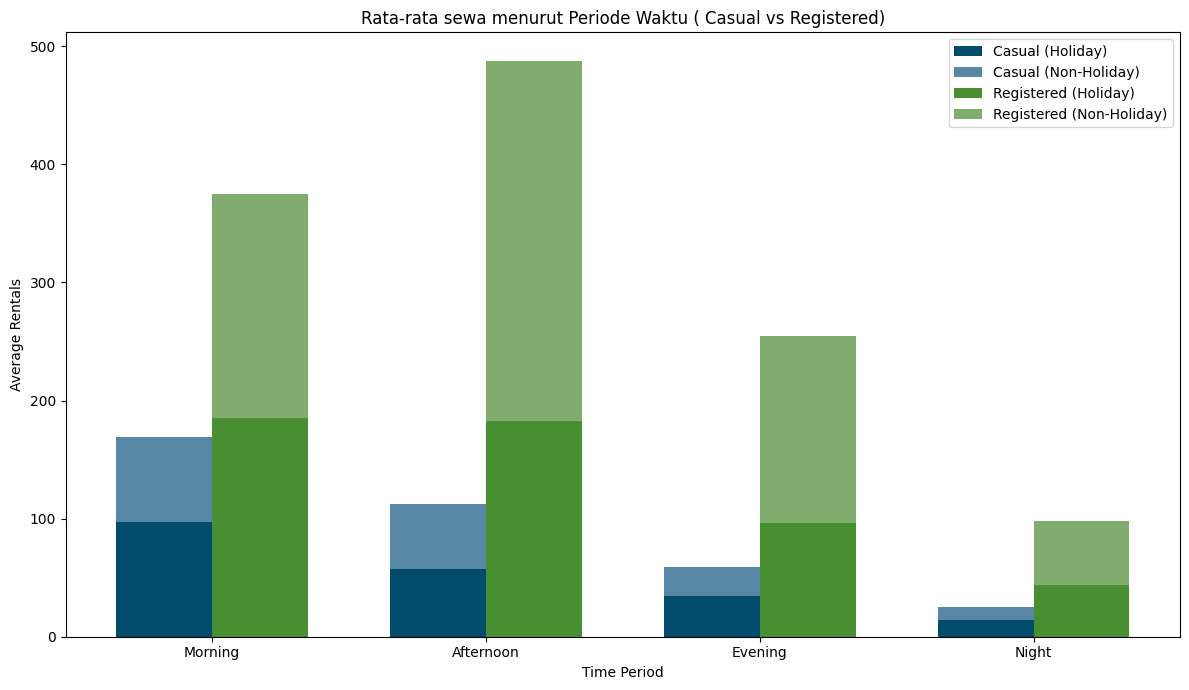

In [ ]:
# Tentukan kategori waktu berdasarkan jam
def categorize_time(hour):
    if 5 <= hour <= 11:
        return 'Morning'
    elif 12 <= hour <= 16:
        return 'Afternoon'
    elif 17 <= hour <= 20:
        return 'Evening'
    else:
        return 'Night'

# Tambahkan kolom baru
df_hour_data['TimePeriod'] = df_hour_data['hr'].apply(categorize_time)

# Kelompokkan data berdasarkan TimePeriod dan Holiday
time_period_clusters = df_hour_data.groupby(['TimePeriod', 'holiday']).agg({
    'casual': 'mean',
    'registered': 'mean'
}).reset_index()

# Visualisasi
fig, ax = plt.subplots(figsize=(12, 7))

bar_width = 0.35  # Bar width
index = np.arange(len(time_period_clusters['TimePeriod'].unique()))

# Warna utk holiday dan non-holiday
holiday_casual_color = '#004c6d'
non_holiday_casual_color = '#5886a5'
holiday_registered_color = '#488f31'
non_holiday_registered_color = '#80ad6d'

# Filter data utk setiap kategori
holiday_data = time_period_clusters[time_period_clusters['holiday'] == 1]
non_holiday_data = time_period_clusters[time_period_clusters['holiday'] == 0]

# Plot stacked bars utk pengguna casual
ax.bar(index,
       holiday_data['casual'],
       bar_width, label='Casual (Holiday)', color=holiday_casual_color)

ax.bar(index,
       non_holiday_data['casual'],
       bar_width, bottom=holiday_data['casual'], label='Casual (Non-Holiday)', color=non_holiday_casual_color)

# Plot stacked bars utk pengguna registered
ax.bar(index + bar_width,
       holiday_data['registered'],
       bar_width, label='Registered (Holiday)', color=holiday_registered_color)

ax.bar(index + bar_width,
       non_holiday_data['registered'],
       bar_width, bottom=holiday_data['registered'], label='Registered (Non-Holiday)', color=non_holiday_registered_color)

# Label dan Legenda
ax.set_xlabel('Time Period')
ax.set_ylabel('Average Rentals')
ax.set_title('Rata-rata sewa menurut Periode Waktu ( Casual vs Registered)')
ax.set_xticks(index + bar_width / 2)  # Center labels between bars
ax.set_xticklabels(['Morning', 'Afternoon', 'Evening', 'Night'])
ax.legend()

plt.tight_layout()
plt.show()

***Insight :***

- Di semua kategori, kontribusi pengguna terdaftar lebih signifikan dibandingkan pengguna biasa, baik pada hari libur maupun hari kerja.
- Pada kategori "Malam", jumlah penyewaan sepeda (baik pengguna biasa maupun terdaftar) merupakan yang tertinggi dibandingkan periode lainnya.
- Penyewaan sepeda dalam kategori "Pagi" menunjukkan aktivitas yang lebih rendah dibandingkan periode waktu lainnya.
- Bagi pengguna biasa, harga sewa cenderung lebih tinggi selama liburan di semua periode waktu.
- Bagi pengguna terdaftar, penyewaan lebih dominan terjadi pada hari kerja (bukan hari libur), terutama pada kategori "Sore" dan "Malam".

# Kesimpulan & Rekomendasi
***1. Q1 (Pola Sewa Selisih)***

- Data ini menunjukkan pentingnya layanan sepeda sebagai alat transportasi harian bagi pengguna terdaftar, sedangkan bagi pengguna kasual, sepeda sebagian besar digunakan untuk kegiatan rekreasi.
- Meningkatkan fasilitas dan ketersediaan sepeda pada hari kerja mungkin lebih penting untuk memenuhi kebutuhan pengguna terdaftar.
- Pada akhir pekan, berfokus pada pengguna biasa, seperti melalui promosi atau kampanye wisata bersepeda, dapat menarik lebih banyak pengguna.

***2. Q2 (Sewa sepeda tertinggi per jam)***

- Pengguna terdaftar mendominasi penyewaan selama jam sibuk (pagi dan sore), yang menunjukkan penggunaan layanan sebagai alat transportasi utama.
- Pengguna biasa memiliki volume penyewaan yang jauh lebih rendah daripada pengguna terdaftar tetapi tetap konsisten sepanjang hari.
- Perbedaan pola ini menunjukkan bahwa pengguna terdaftar lebih terikat pada jadwal harian (misalnya, bekerja atau sekolah), sementara pengguna biasa lebih fleksibel dalam memilih waktu sewa.
- Untuk memberikan layanan optimal kepada pengguna terdaftar, ketersediaan sepeda selama jam sibuk (pagi dan sore) sangat penting.
- Bagi pengguna biasa, promosi dan layanan tambahan di malam hari atau akhir pekan dapat membantu meningkatkan jumlah penyewaan.

***3. Q3 (Anomali berdasarkan lonjakan atau penurunan tiba-tiba)***

- Cuaca cerah cenderung meningkatkan persewaan meskipun ada anomali, sementara cuaca buruk menurunkan persewaan.
- Kecepatan angin memiliki sedikit pengaruh, hanya bila dikombinasikan dengan kondisi cuaca tertentu.

***Kesimpulan Analisis Pengelompokan Berbasis Waktu***

- Periode sore dan malam hari merupakan periode yang paling banyak digunakan, terutama oleh pengguna terdaftar. Oleh karena itu, promosi yang menyasar kelompok ini sebaiknya dilakukan pada periode ini.
- Untuk meningkatkan penggunaan di pagi hari, promosi khusus seperti diskon pagi dapat diterapkan.
- Selama liburan, pengguna kasual mendominasi. Ini menunjukkan bahwa promosi yang ditujukan kepada wisatawan atau kegiatan rekreasi dapat efektif selama periode ini.
- Menambah atau mendistribusikan lebih banyak sepeda pada sore dan malam hari dapat membantu mengatasi lonjakan permintaan selama periode tersebut.
- Untuk hari kerja (bukan hari libur), fokus pada pengguna terdaftar dapat mencakup program loyalitas atau layanan tambahan untuk meningkatkan pengalaman pelanggan.
- Pengguna terdaftar lebih dominan pada hari kerja, yang menunjukkan bahwa layanan tersebut merupakan bagian dari rutinitas mereka. Memperkenalkan layanan tambahan, seperti rute premium atau paket langganan bulanan, dapat meningkatkan kepuasan pengguna.